In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

In [2]:
img=cv2.imread("C:/Users/mduma/Downloads/machine-learning-main/machine-learning-main/make mask/OSCC_100x_39.jpg")
img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
img2= img.reshape(-1)
df=pd.DataFrame()
df["Original Image"]=img2


In [4]:
num=1
kernels=[]
for theta in range(2):
    theta=theta /4 *np.pi
    for sigma in (1,3):
        for lamda in np.arange(0,np.pi,np.pi /4):
            for gamma in(0.05, 0.5):
                gabor_label='Gabor'+str(num)
                ksize=9
                kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                fimg=cv2.filter2D(img,cv2.CV_8UC3,kernel)
                filtered_img=fimg.reshape(-1)
                df[gabor_label]=filtered_img
                num+=1
                        
edges=cv2.Canny(img,100,200)
edges1=edges.reshape(-1)
df["Canny edge"]=edges1
        
edge_roberts=roberts(img)
edge_roberts1=edge_roberts.reshape(-1)
df['Roberts']=edge_roberts1

edge_sobel =sobel(img)
edge_sobel1=edge_sobel.reshape(-1)
df['Sobel']= edge_sobel1

edge_scharr = scharr(img)
edge_scharr1 =edge_scharr.reshape(-1)
df['Scharr']=edge_scharr1

edge_prewitt= prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt']=edge_prewitt1

gaussian_img = nd.gaussian_filter(img,sigma=3)
gaussian_img1= gaussian_img.reshape(-1)
df['Gaussian s3']= gaussian_img1

gaussian_img2= nd.gaussian_filter(img,sigma=7)
gaussian_img3= gaussian_img.reshape(-1)
df['Gaussian s7']=gaussian_img3

median_img= nd.median_filter(img,size=3)
median_img1= median_img.reshape(-1)
df['Median s3']=median_img1

laplacian_img = cv2.Laplacian(img, cv2.CV_8U)
laplacian_img1 = laplacian_img.reshape(-1)
df['Laplacian'] = laplacian_img1

In [5]:
masked_img= cv2.imread("C:/Users/mduma/Downloads/machine-learning-main/machine-learning-main/Mask Done/OSCC_100x_39.tif")
masked_img=cv2.cvtColor(masked_img,cv2.COLOR_BGR2GRAY)
masked_img1=masked_img.reshape(-1)
df['Labels']=masked_img1

In [6]:
y=df["Labels"].values

In [7]:
original_img_data=df.drop(labels=["Labels"],axis=1)


In [8]:
x= df.drop(labels=["Labels"],axis=1)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=20)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=25, random_state=42)

In [11]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [12]:


# Get the number of trees
n_trees = len(model.estimators_)

# Get the depth of each tree
tree_depths = [estimator.tree_.max_depth for estimator in model.estimators_]

# Get the number of internal nodes in each tree
num_internal_nodes = [estimator.tree_.node_count - estimator.tree_.n_leaves for estimator in model.estimators_]


In [13]:
num_internal_nodes

[17634,
 17718,
 17801,
 17840,
 17725,
 17669,
 17629,
 17697,
 17659,
 17595,
 17543,
 17593,
 17635,
 17705,
 17671,
 17748,
 17688,
 17489,
 17833,
 17776,
 17644,
 17902,
 18050,
 17428,
 17438]

In [14]:
from sklearn import metrics
prediction_test_random= model.predict(x_test)
#prediction_test_svm=model_SVM.predict(x_test)
print("Accuracy= ",metrics.accuracy_score(y_test,prediction_test_random))
#print("Accuracy= ",metrics.accuracy_score(y_test,prediction_test_svm))

Accuracy=  0.9933163367485448


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction_test_random))
#print(confusion_matrix(y_test, prediction_test_random))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    624599
         255       0.62      0.20      0.30      4547

    accuracy                           0.99    629146
   macro avg       0.81      0.60      0.65    629146
weighted avg       0.99      0.99      0.99    629146



In [16]:
result=model.predict(original_img_data)

In [17]:
result.shape

(3145728,)

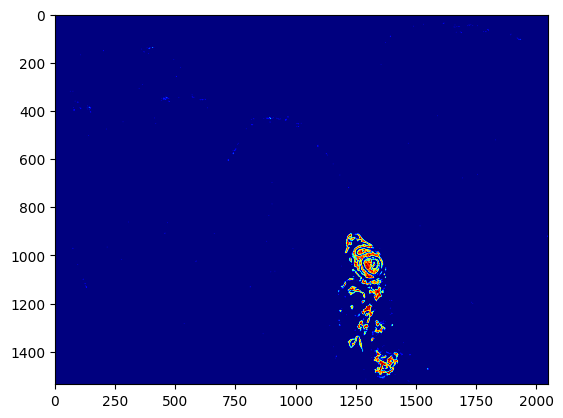

In [18]:
import matplotlib.pyplot as plt
segmented=result.reshape((img.shape))
plt.imshow(segmented,cmap='jet')

In [19]:
cv2.imwrite("C:/Users/mduma/Downloads/machine-learning-main/machine-learning-main/Segmented/Segmentedv2.jpg",segmented)

True

In [20]:
plt.imsave('C:/Users/mduma/Downloads/machine-learning-main/machine-learning-main/Segmented/OSCC_100x_39_sea_map.jpg', segmented, cmap ='jet')